I will upload Q1 in a PDF file along with this file in case it is hard to read it in here.


Q1



To train a 2-layer neural network (1 hidden layer and 1 output layer) using backpropagation for regression with the (MSE) loss, first we need to setup the structure for the neural network:
Inputs = x, hidden layer = W1 for weights and b1 for biases ( sigmoid is the activation function here), output layer W2 for weights and b2 for biases (output just single number, no activation function)

2 - forward Propagation
we calculate the output of the network based on the input.

Hidden Layer: z1 = W1 * x + b1 then the results z1 go in the sigmoid function a1=σ(z1)=1/(1+e^(-z1))

Output layer: y(pred) = W2 * a1 + b1

3- MSE
Loss (MSE)= ½ (y(pred)−y)^2

4- we update W1, W2, b1, b2 to minimize the loss (Backpropagation)
 Using the chain rule we will compute the gradients layer

For the Ouput layer, the error is different between the predicted output and the actual target δ2=y(pred)-y,
then now we can compute how this error affects the weights W2 and biases b2:

Gradient w.r.t w2:
∂Loss/∂W2=δ2⋅a1
Gradient w.r.t b2
∂Loss/∂b2=δ2

Now we gotta propagate this error back to the hidden layer δ1 = δ2  ⋅W2 ⋅ σ′(z1)  
Now we get sigma derivate of z1 σ^' (z1)=a1(1-a1)

then we compute how this affects the weights w1 and b1
Gradient w.r.t w2:
∂Loss/∂W1=δ1⋅x
Gradient w.r.t b2
∂Loss/∂b1=δ1
Now we have the gradients, now we update W and b using gradient descent
W2←W2-η ∂Loss/∂W2,   b1←b2-η ∂Loss/∂b2

W1←W1-η ∂Loss/∂W1 , b1←b2-η ∂Loss/∂b1  
Where η (eta) is the learning rate that controls the step size of the updates.

 Explain briefly how this is different from the update rule for the network trained for binary classification using log loss.

In binary classification with log loss instead of using MSE we use log loss to measure the difference between the predicted probability and the actual binary label (0 or 1).
For regression with MSE: The output is a continuous number, and we use MSE to calculate the error.
For binary classification with log loss: The output is a probability (0 or 1), and we use log loss (cross-entropy) to measure the error.




* Answer Q2
* Q2.1: I will use the sigmoid activation function for the output layer. because sigmoid maps the output to between [0, 1], and that is good for binary classification.


* Q 2.2: There should be 1 neuron in the output layer because we are using binary classification and binary classification outputs predict a single binary label (0 or 1).

* Q 2.3 Q3: Training Accuracy: 96.12%
Validation Accuracy: 98.00%
Average MSE Loss: 0.0571 as shown down below

* Q 2.4 : the loss and accuracy as a function of the number of iterations are plotted below

* Q 2.5: Q5: the larger the learning rate gets the more decay or slower learning of the function, the resulting accuracy as a function of learning rate has been plotted down below


* Q 2.6: As the number increases with neurons and hidden layers the performance gets better.
* 6a: No it doesn't because changing it it just expands and add another weight
* 6b. Final Loss: When the number of hidden neurons goes from 1 to 3, the loss goes down a lot which means adding neurons helps the model reduce its error. After 3 neurons, the loss stays fairly low something around 0.03 to 0.05. meaning adding more neurons doesn’t reduce the error much further. Accuracy: With 1 or 2 neurons, the model’s accuracy is lower (around 85%-88%). This means the model struggles to capture the complexity of the data with so few neurons. Starting with 3 neurons, the accuracy jumps up to 98% and stays there as we add more neurons. This means the model is performing very well with at least 3 neurons

* Q2.7
* 7a - No the update rule doesn’t change, we can use the same update rule for tanh.
* 7b - just the activation function in forward pass and its derivative ( we will use ReLU and tanh instead of sigmoid)  
ReLU to set all negative values to zero and keeps positive values as they are, and tanh to map the values between -1 and 1

* 7c

* ReLU Activation:
* Final Loss: 0.0750 (means good performance)
* Training Observations: The loss decreased quickly but showed some instability during training
* tanh Activation:
* Final Loss: 0.0209
* Training Observations: The training was more stable. The loss consistently decreased without any noticeable spikes. The final loss was slightly higher than ReLU but still very close
* Both ReLU and tanh achieved similar final performance with almost identical loss values
* both activation functions are effective for this dataset.

* in usual ReLU tends to learn faster and
converges quicker as it doesn’t saturate like sigmoid or tanh, but it  can cause dead neurons if the gradient is zero for negative values.
* tanh has better range than sigmoid (-1 to 1), which helps avoid some of the issues with vanishing gradients, but it can still suffer from saturation for very large or very small inputs.




* Q2.8

*  8a Low Patience : Training stops quickly, and the model may not learn enough. This can cause underfitting.
* Moderate Patience : Training continues long enough to improve performance without overfitting. It's usually a good balance.
* High Patience : The model keeps training even after validation loss stops improving, leading to overfitting.

*   8b from the graph we can tell that the model is neither overfitting nor underfitting. The patience of 10 seems to be working well, allowing the model to train sufficiently without overtraining.




* Q 2.9 I would prefer early stopping over L2 regularization because early stopping doesn't require you to set an extra hyperparameter and  It dynamically adapts the training process based on the validation performance, also early stopping as monitors validation performance and stops training at the right time while overfitting.

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X_train = np.loadtxt("X_train.csv")
Y_train = np.loadtxt("Y_train.csv")
X_test = np.loadtxt("X_test.csv")
Y_test = np.loadtxt("Y_test.csv")
#Sample DATASET
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Splitting into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [88]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

    # Sigmoid activation function
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    # Derivative of sigmoid
    def sigmoid_derivative(self, z):
        return z * (1 - z)


    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    # Backward propagation
    def backward(self, X, y, learning_rate=0.01):
        m = X.shape[0]
        output = self.forward(X)

        # Calculate the error
        error = output - y.reshape(-1, 1)

        # Gradients for W2 and b2
        dW2 = np.dot(self.a1.T, error * self.sigmoid_derivative(output))
        db2 = np.sum(error * self.sigmoid_derivative(output), axis=0, keepdims=True)

        # Gradients for W1 and b1
        dW1 = np.dot(X.T, np.dot(error * self.sigmoid_derivative(output), self.W2.T) * self.sigmoid_derivative(self.a1))
        db1 = np.sum(np.dot(error * self.sigmoid_derivative(output), self.W2.T) * self.sigmoid_derivative(self.a1), axis=0)

        # Update weights and biases
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    # Loss function (MSE)
    def loss(self, output, y):
        return np.mean((output - y.reshape(-1, 1)) ** 2)

    # Training the model
    def train(self, X, y, learning_rate=0.01, iterations=1000):
        losses = []
        for i in range(iterations):
            output = self.forward(X)
            self.backward(X, y, learning_rate)
            loss = self.loss(output, y)
            losses.append(loss)
            if i % 100 == 0:
                print(f"Iteration {i}, Loss: {loss}")
        return losses


Q4: the loss and accuracy as a function of the number of iterations are plotted below this code

Questions 3 answer is down below(MSE LOSE and ACCURCY)
Iteration 0, Loss: 0.22177006804528127
Iteration 100, Loss: 0.09025889896226232
Iteration 200, Loss: 0.08183164160739544
Iteration 300, Loss: 0.06714105667364116
Iteration 400, Loss: 0.055006014036994504
Iteration 500, Loss: 0.047581533596563495
Iteration 600, Loss: 0.04300515454302845
Iteration 700, Loss: 0.03998302574704776
Iteration 800, Loss: 0.03785490607284223
Iteration 900, Loss: 0.03627632470749366


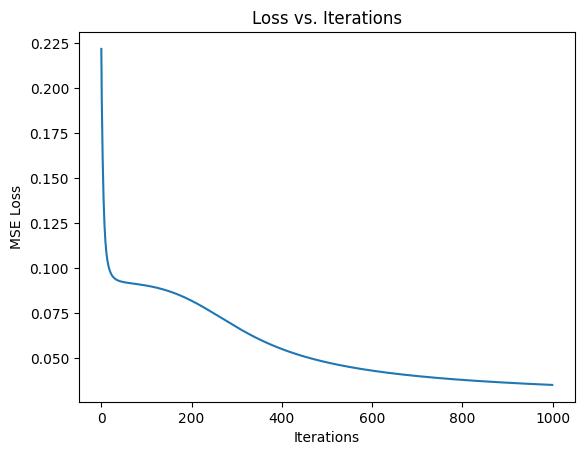

Training Accuracy: 96.12%
Validation Accuracy: 98.00%
Average MSE Loss: 0.0571


In [89]:
# Define hyperparameters
input_size = X_train.shape[1]
hidden_size = 5
output_size = 1
learning_rate = 0.01
iterations = 1000
print("Questions 3 answer is down below(MSE LOSE and ACCURCY)")
# Create the neural network
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Train the model
losses = nn.train(X_train, y_train, learning_rate, iterations)

# Plot the loss over time
plt.plot(losses)
plt.title("Loss vs. Iterations")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.show()

# Function to calculate accuracy
def accuracy(X, y, model):
    predictions = model.forward(X)
    predictions = np.round(predictions)  # Rounding sigmoid output to 0 or 1
    return np.mean(predictions == y.reshape(-1, 1))

# Calculate and report accuracy
train_accuracy = accuracy(X_train, y_train, nn)
val_accuracy = accuracy(X_val, y_val, nn)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
# Compute the average MSE loss
average_mse_loss = np.mean(losses)
print(f"Average MSE Loss: {average_mse_loss:.4f}")



Q5: the larger the learning rate gets the more decay or slower learning of the function, the resulting accuracy as a function of learning rate has been plotted down below

Iteration 0, Loss: 0.22022988872417815
Iteration 100, Loss: 0.11684326456064163
Iteration 200, Loss: 0.10192608339194922
Iteration 300, Loss: 0.09768715111004851
Iteration 400, Loss: 0.095902469734676
Iteration 500, Loss: 0.09497851329056534
Iteration 600, Loss: 0.09442314932685963
Iteration 700, Loss: 0.09404899100527739
Iteration 800, Loss: 0.09377489932192606
Iteration 900, Loss: 0.09356183367857597
Iteration 0, Loss: 0.1929252160940897
Iteration 100, Loss: 0.08507007124178877
Iteration 200, Loss: 0.07005695026324621
Iteration 300, Loss: 0.05638119875699208
Iteration 400, Loss: 0.04808099504334699
Iteration 500, Loss: 0.04310001717072041
Iteration 600, Loss: 0.039867443692729425
Iteration 700, Loss: 0.03760350534021702
Iteration 800, Loss: 0.03590452675949012
Iteration 900, Loss: 0.0345369849519274
Iteration 0, Loss: 0.2602080473110642
Iteration 100, Loss: 0.02527922191953068
Iteration 200, Loss: 0.022874803056257144
Iteration 300, Loss: 0.022201665147274965
Iteration 400, Loss: 0.0

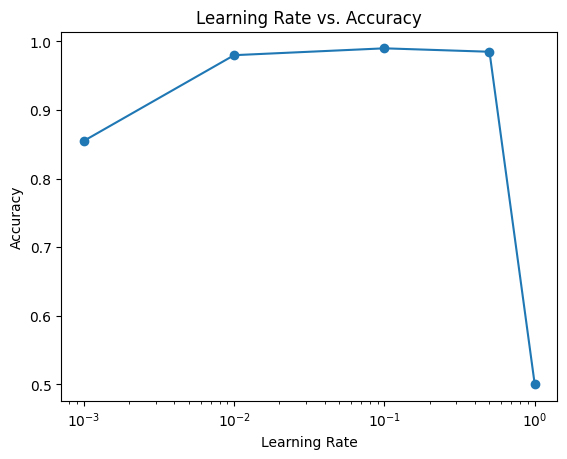

In [90]:
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
accuracies = []

for lr in learning_rates:
    nn = NeuralNetwork(input_size, hidden_size, output_size)
    nn.train(X_train, y_train, learning_rate=lr, iterations=1000)
    acc = accuracy(X_val, y_val, nn)
    accuracies.append(acc)

# Plot learning rate vs accuracy
plt.plot(learning_rates, accuracies, marker='o')
plt.xscale('log')
plt.title("Learning Rate vs. Accuracy")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.show()


Iteration 0, Loss: 0.2627991918549595
Iteration 100, Loss: 0.09575775028524454
Iteration 200, Loss: 0.09416805249516998
Iteration 300, Loss: 0.09338899187144985
Iteration 400, Loss: 0.0929404017998765
Iteration 500, Loss: 0.09265083153620561
Iteration 600, Loss: 0.0924473290600163
Iteration 700, Loss: 0.09229548576454669
Iteration 800, Loss: 0.0921771356154445
Iteration 900, Loss: 0.09208180661421991
Iteration 0, Loss: 0.2909655271617318
Iteration 100, Loss: 0.09476414496539437
Iteration 200, Loss: 0.09361910527029117
Iteration 300, Loss: 0.0929574263657422
Iteration 400, Loss: 0.09252689907276469
Iteration 500, Loss: 0.09227417648890132
Iteration 600, Loss: 0.09210942236293448
Iteration 700, Loss: 0.09198509252928837
Iteration 800, Loss: 0.09188473861460743
Iteration 900, Loss: 0.09180087250872529
Iteration 0, Loss: 0.35939966716065286
Iteration 100, Loss: 0.09270719572873576
Iteration 200, Loss: 0.09223597238745228
Iteration 300, Loss: 0.09198375338571249
Iteration 400, Loss: 0.09182

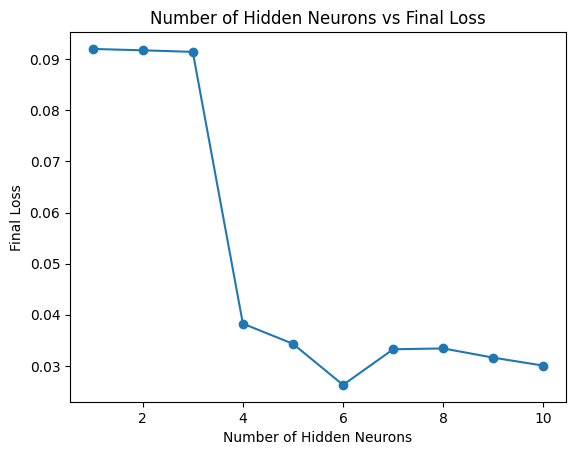

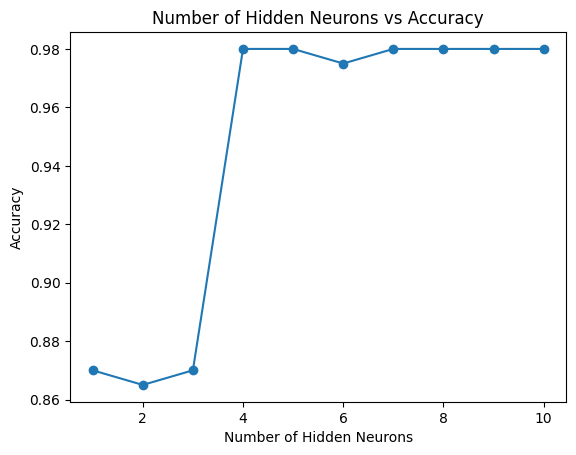

In [91]:
neuron_counts = range(1, 11)
final_losses = []
accuracies = []

for n_neurons in neuron_counts:
    nn = NeuralNetwork(input_size, n_neurons, output_size)
    losses = nn.train(X_train, y_train, learning_rate=0.01, iterations=1000)
    final_loss = losses[-1]
    acc = accuracy(X_val, y_val, nn)
    final_losses.append(final_loss)
    accuracies.append(acc)

# Plot number of neurons vs final loss
plt.plot(neuron_counts, final_losses, marker='o')
plt.title("Number of Hidden Neurons vs Final Loss")
plt.xlabel("Number of Hidden Neurons")
plt.ylabel("Final Loss")
plt.show()

# Plot number of neurons vs accuracy
plt.plot(neuron_counts, accuracies, marker='o')
plt.title("Number of Hidden Neurons vs Accuracy")
plt.xlabel("Number of Hidden Neurons")
plt.ylabel("Accuracy")
plt.show()


* Q6
*   6.As the number increases with neurons and hidden layers the performance gets better.



*   6a: No it doesn't because changing it it just expands and add another weight


*   6b. Final Loss:
When the number of hidden neurons goes from 1 to 3, the loss goes down a lot. This means adding neurons helps the model reduce its error.
After 3 neurons, the loss stays fairly low (around 0.03 to 0.05). This means adding more neurons doesn’t reduce the error much further.
Accuracy:
With 1 or 2 neurons, the model’s accuracy is lower (around 85%-88%). This means the model struggles to capture the complexity of the data with so few neurons.
Starting with 3 neurons, the accuracy jumps up to 98% and stays there as we add more neurons. This means the model is performing very well with at least 3 neurons





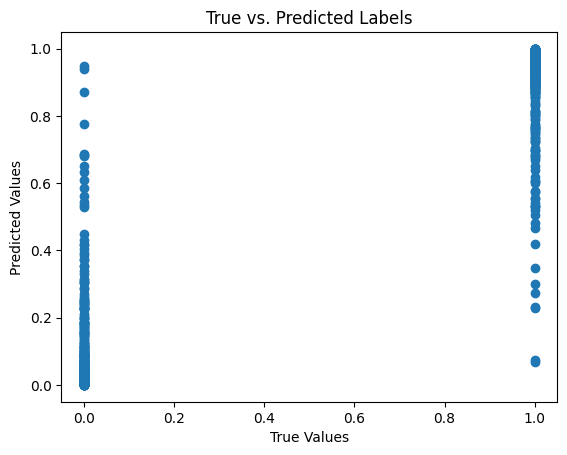

In [92]:
y_pred = nn.forward(X_train)
plt.scatter(y_train, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Labels")
plt.show()


Q7.


In [93]:
# Activation functions relu and tanh
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return np.where(z > 0, 1, 0)

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.tanh(z) ** 2

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

# Neural Network Class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation='sigmoid'):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

        # Set the activation function, relu and tanh
        if activation == 'relu':
            self.activation = relu
            self.activation_derivative = relu_derivative
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_derivative = tanh_derivative
        else:  # Default is sigmoid
            self.activation = sigmoid
            self.activation_derivative = sigmoid_derivative

    # Forward propagation
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.activation(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)  # Output layer uses sigmoid for binary classification
        return self.a2

    # Backward propagation
    def backward(self, X, y, learning_rate=0.01):
        m = X.shape[0]
        output = self.forward(X)
        error = output - y.reshape(-1, 1)

        # Gradients for W2 and b2
        dW2 = np.dot(self.a1.T, error * sigmoid_derivative(output))
        db2 = np.sum(error * sigmoid_derivative(output), axis=0, keepdims=True)

        # Gradients for W1 and b1
        dW1 = np.dot(X.T, np.dot(error * sigmoid_derivative(output), self.W2.T) * self.activation_derivative(self.a1))
        db1 = np.sum(np.dot(error * sigmoid_derivative(output), self.W2.T) * self.activation_derivative(self.a1), axis=0)

        # Update weights and biases
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    #  MSE loss function
    def loss(self, output, y):
        return np.mean((output - y.reshape(-1, 1)) ** 2)

    # Training the model
    def train(self, X, y, learning_rate=0.01, iterations=1000):
        losses = []
        for i in range(iterations):
            output = self.forward(X)
            self.backward(X, y, learning_rate)
            loss = self.loss(output, y)
            losses.append(loss)
            if i % 100 == 0:
                print(f"Iteration {i}, Loss: {loss}")
        return losses


In [94]:
# Define hyperparameters
input_size = X_train.shape[1]
hidden_size = 5
output_size = 1
learning_rate = 0.01
iterations = 1000


Iteration 0, Loss: 0.4337954087029024
Iteration 100, Loss: 0.07837938319778047
Iteration 200, Loss: 0.07635108047215491
Iteration 300, Loss: 0.07575200894440609
Iteration 400, Loss: 0.07545419837414698
Iteration 500, Loss: 0.07531842085036815
Iteration 600, Loss: 0.07520777359616684
Iteration 700, Loss: 0.07511905326568064
Iteration 800, Loss: 0.07506432496761019
Iteration 900, Loss: 0.07501754874297814


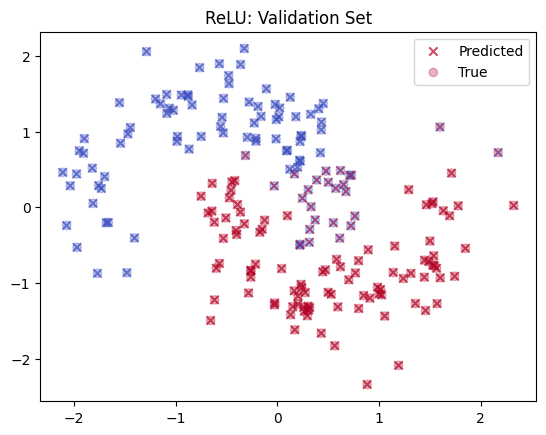

Iteration 0, Loss: 0.5243390664992365
Iteration 100, Loss: 0.08915129342294068
Iteration 200, Loss: 0.05572645772435968
Iteration 300, Loss: 0.027221999686183773
Iteration 400, Loss: 0.023868160091417786
Iteration 500, Loss: 0.022733564370059592
Iteration 600, Loss: 0.022116563694486942
Iteration 700, Loss: 0.021680737062661284
Iteration 800, Loss: 0.02131871274452211
Iteration 900, Loss: 0.02098967331549792


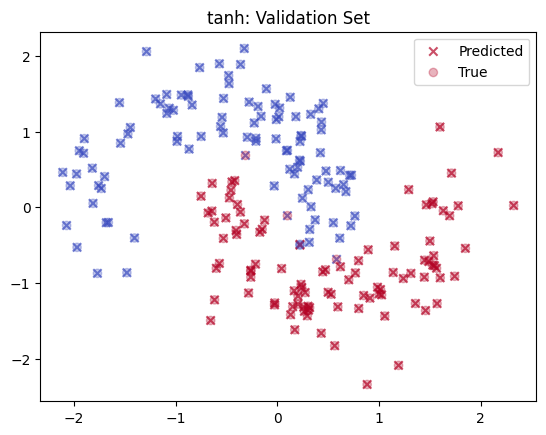

In [95]:
# ReLU
nn_relu = NeuralNetwork(input_size, hidden_size, output_size, activation='relu')
losses_relu = nn_relu.train(X_train, y_train, learning_rate=0.01, iterations=1000)
plot_predictions(X_val, y_val, nn_relu, "ReLU: Validation Set")

# tanh
nn_tanh = NeuralNetwork(input_size, hidden_size, output_size, activation='tanh')
losses_tanh = nn_tanh.train(X_train, y_train, learning_rate=0.01, iterations=1000)
plot_predictions(X_val, y_val, nn_tanh, "tanh: Validation Set")


Q8

In [96]:
def train_with_early_stopping(X_train, y_train, X_val, y_val, patience=10, iterations=1000, learning_rate=0.01):
    best_loss = float('inf')
    patience_counter = 0
    losses_train = []
    losses_val = []

    nn = NeuralNetwork(input_size, hidden_size, output_size)

    for i in range(iterations):
        nn.train(X_train, y_train, learning_rate=learning_rate, iterations=1)
        train_loss = nn.loss(nn.forward(X_train), y_train)
        val_loss = nn.loss(nn.forward(X_val), y_val)

        losses_train.append(train_loss)
        losses_val.append(val_loss)

        # Check early stopping
        if val_loss < best_loss:
            best_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at iteration {i+1}")
            break

    return losses_train, losses_val

losses_train, losses_val = train_with_early_stopping(X_train, y_train, X_val, y_val, patience=10)


Iteration 0, Loss: 0.2504490844752799
Iteration 0, Loss: 0.22204577013703145
Iteration 0, Loss: 0.20749008839034352
Iteration 0, Loss: 0.19390003767838862
Iteration 0, Loss: 0.1809549544692704
Iteration 0, Loss: 0.16869845075552198
Iteration 0, Loss: 0.15733144151906792
Iteration 0, Loss: 0.14706267491647046
Iteration 0, Loss: 0.13802544242687362
Iteration 0, Loss: 0.13025326095405795
Iteration 0, Loss: 0.12369350775911343
Iteration 0, Loss: 0.11823637940042715
Iteration 0, Loss: 0.11374377784623782
Iteration 0, Loss: 0.1100712543812282
Iteration 0, Loss: 0.1070818628879448
Iteration 0, Loss: 0.10465337391127734
Iteration 0, Loss: 0.10268092601039867
Iteration 0, Loss: 0.10107693200096633
Iteration 0, Loss: 0.09976955364380774
Iteration 0, Loss: 0.09870058771499941
Iteration 0, Loss: 0.09782325268654272
Iteration 0, Loss: 0.09710012896364045
Iteration 0, Loss: 0.09650136089646756
Iteration 0, Loss: 0.0960031471274196
Iteration 0, Loss: 0.09558650415388298
Iteration 0, Loss: 0.095236269

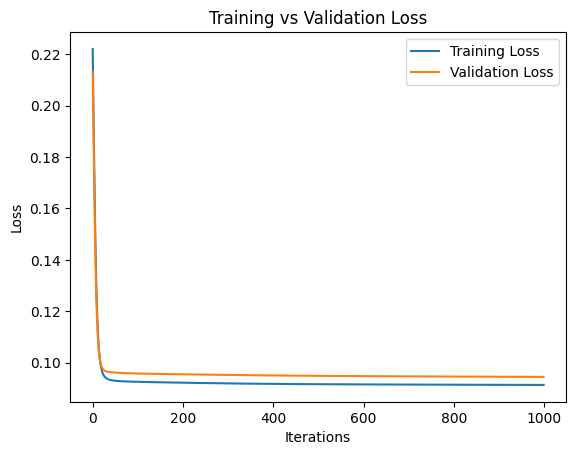

In [97]:
# Plot training and validation loss curves
plt.plot(losses_train, label='Training Loss')
plt.plot(losses_val, label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [98]:
class NeuralNetworkWithL2(NeuralNetwork):
    def __init__(self, input_size, hidden_size, output_size, activation='sigmoid', l2_lambda=0.01):
        super().__init__(input_size, hidden_size, output_size, activation)
        self.l2_lambda = l2_lambda

    # Modified loss function with L2 regularization
    def loss(self, output, y):
        mse_loss = np.mean((output - y.reshape(-1, 1)) ** 2)
        l2_loss = (self.l2_lambda / 2) * (np.sum(self.W1 ** 2) + np.sum(self.W2 ** 2))
        return mse_loss + l2_loss

    # Backward propagation with L2 regularization
    def backward(self, X, y, learning_rate=0.01):
        m = X.shape[0]
        output = self.forward(X)
        error = output - y.reshape(-1, 1)

        # Gradients for W2 and b2 with L2 regularization
        dW2 = np.dot(self.a1.T, error * sigmoid_derivative(output)) + (self.l2_lambda * self.W2)
        db2 = np.sum(error * sigmoid_derivative(output), axis=0, keepdims=True)

        # Gradients for W1 and b1 with L2 regularization
        dW1 = np.dot(X.T, np.dot(error * sigmoid_derivative(output), self.W2.T) * self.activation_derivative(self.a1)) + (self.l2_lambda * self.W1)
        db1 = np.sum(np.dot(error * sigmoid_derivative(output), self.W2.T) * self.activation_derivative(self.a1), axis=0)


        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2



Q9

Iteration 0, Loss: 0.28244809077847355
Iteration 100, Loss: 0.1798421187844654
Iteration 200, Loss: 0.24954550188461497
Iteration 300, Loss: 0.3269729411953027
Iteration 400, Loss: 0.37374219722095725
Iteration 500, Loss: 0.40825599459559797
Iteration 600, Loss: 0.437500187397054
Iteration 700, Loss: 0.4628657274809419
Iteration 800, Loss: 0.4848842903947926
Iteration 900, Loss: 0.506173196838604


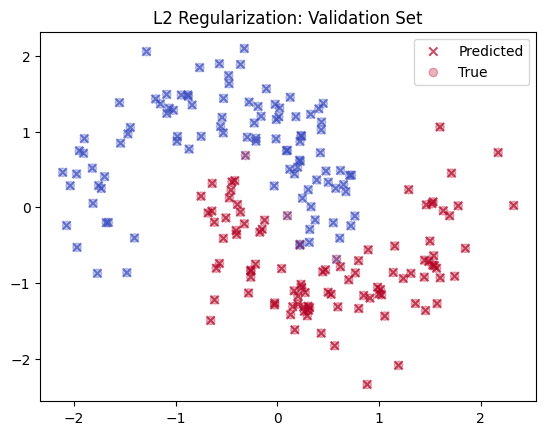

In [99]:
# Example training with L2 regularization
l2_lambda = 0.01  # You can tune this value
nn_l2 = NeuralNetworkWithL2(input_size, hidden_size, output_size, activation='relu', l2_lambda=l2_lambda)
losses_l2 = nn_l2.train(X_train, y_train, learning_rate=0.01, iterations=1000)

# Plot the predictions and losses for L2 regularization
plot_predictions(X_val, y_val, nn_l2, "L2 Regularization: Validation Set")



Iteration 0, Loss: 0.2906603065603967
Iteration 0, Loss: 0.20955115053078857
Iteration 0, Loss: 0.17754875223131067
Iteration 0, Loss: 0.15568738131143858
Iteration 0, Loss: 0.14048256015962132
Iteration 0, Loss: 0.1297074214875854
Iteration 0, Loss: 0.12190984018909536
Iteration 0, Loss: 0.1161438943343439
Iteration 0, Loss: 0.11179028815447893
Iteration 0, Loss: 0.10843874341852096
Iteration 0, Loss: 0.10581291271527277
Iteration 0, Loss: 0.10372310066039883
Iteration 0, Loss: 0.10203651373406185
Iteration 0, Loss: 0.1006583838001039
Iteration 0, Loss: 0.09951982735640222
Iteration 0, Loss: 0.09856990904406014
Iteration 0, Loss: 0.09777036267866877
Iteration 0, Loss: 0.09709201787373584
Iteration 0, Loss: 0.09651233936036178
Iteration 0, Loss: 0.09601370437744058
Iteration 0, Loss: 0.09558217772769365
Iteration 0, Loss: 0.09520662776950319
Iteration 0, Loss: 0.09487807955286305
Iteration 0, Loss: 0.09458923530897768
Iteration 0, Loss: 0.0943341146710347
Iteration 0, Loss: 0.094107781

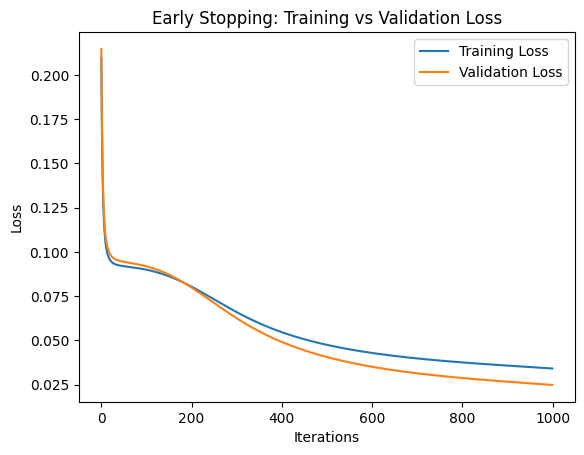

In [100]:
# Example training with early stopping
losses_train, losses_val = train_with_early_stopping(X_train, y_train, X_val, y_val, patience=10)

# Plot training and validation loss curves for early stopping
plt.plot(losses_train, label='Training Loss')
plt.plot(losses_val, label='Validation Loss')
plt.title("Early Stopping: Training vs Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()
